### Author : Nour Shosharah

## Task1-Prediction using Supervised ML
### Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

#### Step 1 - import librires

In [2]:

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

#### Step 2 - Reading the data from source

In [4]:
## import Data from url
# url = "http://bit.ly/w-data"
# data = pd.read_csv(url)
## import from csv file
data=pd.read_csv("marks_data.csv")
print("Data imported successfully")
data.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### Step 3 - Explore Data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


array([[<AxesSubplot:title={'center':'Hours'}>,
        <AxesSubplot:title={'center':'Scores'}>]], dtype=object)

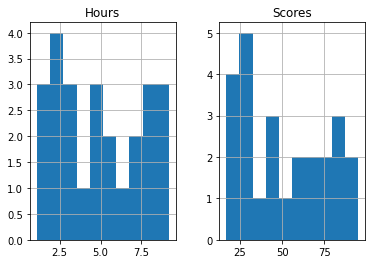

In [8]:
data.hist()

#### Step 4 - data Visualization

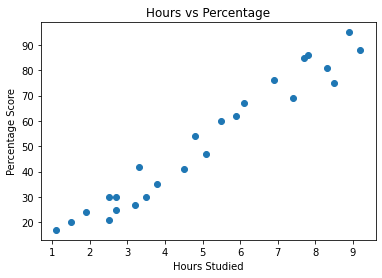

In [29]:
# Plotting the distribution of scores
plt.scatter(data.Hours,data.Scores)
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.



#### Step 5 - data spliting and Model Training

In [38]:
X = data.iloc[:, :-1].values 
y = data.iloc[:, 1].values  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [39]:
from sklearn.linear_model import LinearRegression
linearRegressor= LinearRegression()
linearRegressor.fit(X_train.reshape(-1,1), y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Step 6 - Plotting the Line of regression

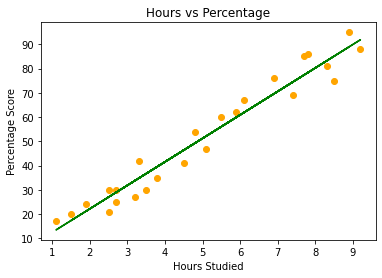

In [40]:
line = linearRegressor.coef_*X+linearRegressor.intercept_
# Plotting for the test data
plt.scatter(X, y,color='orange')
plt.plot(X, line,color='green');
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

#### Step 7 - Make predictions

In [41]:
y_predict= linearRegressor.predict(X_test)


In [42]:
y_predict

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

##### compare results with actual data

In [43]:
data_evaluation= pd.DataFrame({'Actual': y_test,'Predicted': y_predict})
data_evaluation

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


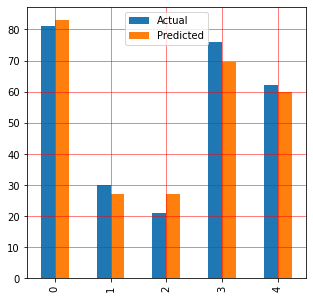

In [46]:
data_evaluation.plot(kind='bar',figsize=(5,5))
plt.grid(which='major', linewidth='0.5', color='red')
plt.grid(which='minor', linewidth='0.5', color='blue')
plt.show()

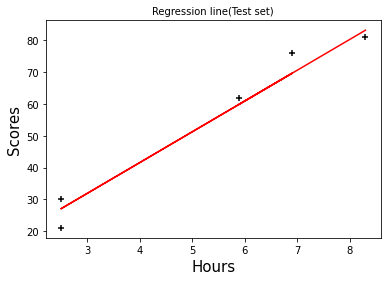

In [47]:
#plotting line on test data
plt.plot(X_test,y_predict,color='red')
plt.scatter(X_test,y_test,color='black',marker='+')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Test set)",fontsize=10)
plt.show()

#### Step 8 - Evaluating the model


In [44]:
#Checking the efficiency of model
mean_squ_error = mean_squared_error(y_test, y_predict)
mean_abs_error = mean_absolute_error(y_test, y_predict)
print("Mean Squred Error:",mean_squ_error)
print("Mean absolute Error:",mean_abs_error)
print('Training Score' , linearRegressor.score(X_train, y_train))
print('Test Score', linearRegressor.score(X_test, y_test))


Mean Squred Error: 18.943211722315272
Mean absolute Error: 3.9207511902099244
Training Score 0.9491209376364417
Test Score 0.9678055545167994


##### make prediction for 9.25 hour/day 

In [26]:
Prediction_score = linearRegressor.predict([[9.25]])
print("predicted score for a student studying 9.25 hours :",Prediction_score)

predicted score for a student studying 9.25 hours : [92.38611528]
